# Project 1: Analysis of SAT & ACT scores across US states


## Problem Statement

Analyze trends in SAT & ACT data from 2017 to 2018 and make recommendations to increase participation in the most appropriate test in at least one state.

## Executive Summary

This study examines the state scores and other external data to determine the various factors that influence the participation rates across states. 

Here are some key findings:

1) A 100% participation rate can only be acheived by the state making either test mandatory and providing the necessary funding to make it affordable for students.
    - For example, Ohio state had made either ACT or SAT compulsory for high school students. This resulted both test participation rates to increase.
    
2) Overall SAT scores improved in year 2018 despite the higher participation rate comparing to previous year, while ACT score remains relatively stable.

3) The [cost of SAT test is relatively high](https://www.vox.com/the-goods/2019/3/28/18282453/sat-act-college-admission-testing-cost-price) comparing to ACT test which might affect which tests states would sponsor.

## Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data


In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data


In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.tail(10)

,State,Participation,English,Math,Reading,Science,Composite
42,South Dakota,80%,20.7,21.5,22.3,22.0,21.8
43,Tennessee,100%,19.5,19.2,20.1,19.9,19.8
44,Texas,45%,19.5,20.7,21.1,20.9,20.7
45,Utah,100%,19.5,19.9,20.8,20.6,20.3
46,Vermont,29%,23.3,23.1,24.4,23.2,23.6
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [5]:
print(sat_2017.info())
sat_2017.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,Nevada,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


In [6]:
print(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


#### 3. Here are some flash findings based on the summary stats:


- Data from all 51 states are represented in both datasets, with an exception of ACT_2017 having an additional row for the entire nation. This row would affect our aggregate analysis and would <b>need to be removed</b>.
- Apart from the component test scores, both datasets also capture the participation rate
- Both datasets have an aggregate feature (Total column in SAT2017 - Sum & Composite column in ACT2017 - Mean)



#### 4a. Does the data look complete? 

#### <I>Yes</I>.
There are no null values from both datasets.



#### 4b. Are there any obvious issues with the observations?


<details>
<summary>More Info</summary>

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
</details>

In [7]:
sat_2017.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,Nevada,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


In [8]:
sat_2017[sat_2017['Math'] == 52]['State']

20    Maryland
Name: State, dtype: object

In [9]:
act_2017.describe(include='all')

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52
unique,52,28,NaN,NaN,NaN,NaN,38
top,Nevada,100%,NaN,NaN,NaN,NaN,21.4
freq,1,17,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,20.919231,21.173077,22.001923,21.040385,NaN
std,NaN,NaN,2.332132,1.963602,2.048672,3.151113,NaN
min,NaN,NaN,16.300000,18.000000,18.100000,2.300000,NaN
25%,NaN,NaN,19.000000,19.400000,20.475000,19.900000,NaN
50%,NaN,NaN,20.550000,20.900000,21.700000,21.150000,NaN
75%,NaN,NaN,23.300000,23.100000,24.125000,22.525000,NaN


In [10]:
act_2017[act_2017['Science'] == 2.3]['State']

21    Maryland
Name: State, dtype: object

#### <I>Yes, there are errors in both datasets.</I>
#### SAT2017
The min value of the Math score seems to be an erroneus outlier. Crossreferenced the state with the official record and confirmed that the right value should be <b>524</b>.
#### ACT2017
The min value of the Science score seems to be an erroneus outlier. Crossreferenced the state with the official record and confirmed that the right value should be <b>22.3</b>.

#### 4c. Fixing errors identified


In [11]:
# change error in math col for SAT2017
sat_2017.loc[sat_2017['State'] == 'Maryland','Math'] = 524

# change error in science col for ACT2017
act_2017.loc[act_2017['State'] == 'Maryland','Science'] = 22.3

#### 5. What are the data types? 


In [12]:
print("ACT2017 dtypes")
print("-" * 50)
act_2017.info()

print('\n\n')

print("SAT2017 dtypes")
print("-" * 50)
sat_2017.info()

ACT2017 dtypes
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB



SAT2017 dtypes
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation   

##### There are 2 main errors:

1) The Participation rate on both datasets should be an integer value


2) The Composite column in ACT2017 seems to be filled with float numbers yet it's returning an object dtype.



#### 6. Fix Incorrect Data Types


In [13]:
def convert_partic_rate(value):
    return int(value.split('%')[0])

act_2017['Participation'] = act_2017['Participation'].apply(convert_partic_rate)
sat_2017['Participation'] = sat_2017['Participation'].apply(convert_partic_rate)

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
# to detect where the problem lies in the column
act_2017['Composite'].value_counts()

act_2017['Composite'] = act_2017['Composite'].apply(lambda y: float(y.split('x')[0]) if 'x' in y else float(y))

- Display the data types again to confirm they are correct.

In [15]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns

<details>
<summary>More Info</summary>
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
</details>

In [16]:
new_act_col_names = list(act_2017.columns)
new_sat_col_names = list(sat_2017.columns)

In [17]:
new_act_col_names = [str("act2017_" + name.lower()) for name in new_act_col_names]
new_act_col_names[0] = new_act_col_names[0].split("act2017_")[1]
act_2017.set_axis(new_act_col_names, axis='columns', inplace=True)

In [18]:
act_2017.head()

,state,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [19]:
new_sat_col_names = [str("sat2017_" + name.lower()) for name in new_sat_col_names]
new_sat_col_names[0] = new_sat_col_names[0].split("sat2017_")[1]
sat_2017.set_axis(new_sat_col_names, axis='columns', inplace=True)

In [20]:
sat_2017.rename(columns={'sat2017_evidence-based reading and writing':'sat2017_rw'},inplace=True)
sat_2017.head()

,state,sat2017_participation,sat2017_rw,sat2017_math,sat2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


#### 8. Create a data dictionary

<details>
<summary>More Info</summary>

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**
</details>    

### Data Dictionary for act_2017/sat_2017

|Feature|Type|Dataset|Description|
|-------|----|-------|------------|
|state|object|act_2017/sat_2017|States that participated in the ACT/SAT examination|
|"name_of_dataset"_participation|integer|act2017/sat2017|State participation rates (%)|
|act2017_english|float|act_2017|Average English Score which ranges between 1 and 36|
|act2017_math|	float|act_2017|	Average Math Score which ranges between 1 and 36|
|act2017_reading|	float|act_2017|	Average Reading Score which ranges between 1 and 36|
|act2017_science|	float|act_2017|	Average Science Score which ranges between 1 and 36|
|act2017_composite|	float|act_2017|	Average Composite Score which ranges between 1 and 36|
|sat2017_rw|integer|sat_2017|	Average Evidence-Based Reading and Writing Score which ranges between 200 and 800|
|sat2017_math|integer|sat_2017|	Average Math Score which ranges between 200 and 800|
|sat2017_total|integer|sat_2017|	Average Total Score that aggregates Reading and Writing and Math Scores, ranges between 400 and 1600|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [21]:
act_2017 = act_2017[act_2017['state'] != 'National']

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
combined_2017 = pd.merge(sat_2017,act_2017, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

<details>
<summary>More Info</summary>
Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.
    </details>

### importing 2018 data

In [24]:
act_2018 = pd.read_csv('../data/act_2018_updated.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [25]:
sat_2018.info()
print('\n')
print(sat_2018.head())
sat_2018.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California

,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00
mean,563.69,556.24,1120.02
std,47.50,47.77,94.16
min,480.00,480.00,977.00
25%,534.50,522.50,1057.50
50%,552.00,544.00,1098.00
75%,610.50,593.50,1204.00
max,643.00,655.00,1298.00


In [26]:
act_2018.info()
print('\n')
print(act_2018.head())
act_2018.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


        State  Percentage of Students Tested  Average Composite Score  \
0     Alabama                            100                     19.1   
1      Alaska                             33                     20.8   
2     Arizona                             66                     19.2   
3 

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.00,51.00,51.00,51.00,51.00,51.00
mean,61.65,21.49,20.99,21.13,22.02,21.35
std,34.08,2.11,2.45,2.04,2.17,1.87
min,7.00,17.70,16.60,17.80,18.00,17.90
25%,28.50,19.95,19.10,19.40,20.45,19.85
50%,66.00,21.30,20.20,20.70,21.60,21.10
75%,100.00,23.55,23.70,23.15,24.10,23.05
max,100.00,25.60,26.00,25.20,26.10,24.90


### Exploring and cleaning 2018 data

At a snapshot, we can observe the following from both datasets:


#### <I>SAT_2018</I>
- ** Participation column needs to be converted to integer
- ** column names to be changed
- No other anomaly in the data


#### <I>ACT_2018</I>
- No anomaly in the data
- ** column names to be changed 

In [27]:
# modify participation column to int in SAT_2018

sat_2018['Participation'] = sat_2018['Participation'].apply(convert_partic_rate)

In [28]:
# change column names in both datasets
new_act_col_names = list(act_2018.columns)
new_sat_col_names = list(sat_2018.columns)

In [29]:
new_sat_col_names[1:] = [str("sat2018_" + name.lower()) for name in new_sat_col_names[1:]]
new_sat_col_names[0] = new_sat_col_names[0].lower()
sat_2018.set_axis(new_sat_col_names, axis='columns', inplace=True)
sat_2018.rename(columns={'sat2018_evidence-based reading and writing':'sat2018_rw'},inplace=True)


# ignore first 2 entries in list and do .split x2 + act2018_
new_act_col_names[2:] = [str("act2018_" + name.lower().split('average ')[1].split(' score')[0]) for name in new_act_col_names[2:]]
# change act2018_percentage of students tested to act2018_participation
new_act_col_names[1] = "act2018_participation"
new_act_col_names[0] = new_act_col_names[0].lower()
act_2018.set_axis(new_act_col_names, axis='columns', inplace=True)

In [30]:
print(f"Here are the new dtypes for sat_2018: \n\n{sat_2018.dtypes}")
print('\n')
print(f"Here are the new dtypes for act_2018: \n\n{act_2018.dtypes}")

Here are the new dtypes for sat_2018: 

state                    object
sat2018_participation     int64
sat2018_rw                int64
sat2018_math              int64
sat2018_total             int64
dtype: object


Here are the new dtypes for act_2018: 

state                     object
act2018_participation      int64
act2018_composite        float64
act2018_english          float64
act2018_math             float64
act2018_reading          float64
act2018_science          float64
dtype: object


### Combine your 2017 and 2018 data into a single dataframe
<details>
<summary>More Info</summary>Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.
 </details>

In [31]:
combined_2018 = pd.merge(act_2018,sat_2018, on='state')
final = pd.merge(combined_2017,combined_2018, on='state')

final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics


In [32]:
final.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sat2017_participation,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0
sat2017_rw,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0
sat2017_math,51.0,556.88,47.12,468.0,523.50,548.0,599.00,651.0
sat2017_total,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0
act2017_participation,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
act2017_english,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
act2017_math,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
act2017_reading,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
act2017_science,51.0,21.43,1.73,18.2,19.95,21.3,22.75,24.9
act2017_composite,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5


In [33]:
# function to manually create standard deviation
def std_dev(data):
    sd = 0.0
    for each in data:
        sd += (float(each) - data.mean())**2
    sd = (sd / float(len(data)))**0.5

    return sd

In [34]:
# Using a dictionary comprehension to apply your standard deviation function to each numeric column in the dataframe
std_dev_dict = {}
checklist = list(final.describe().columns)
  
std_dev_dict = {column:round(std_dev(final[column]),2) for column in checklist}    
std_dev_dict

{'sat2017_participation': 34.93,
 'sat2017_rw': 45.22,
 'sat2017_math': 46.66,
 'sat2017_total': 91.58,
 'act2017_participation': 31.82,
 'act2017_english': 2.33,
 'act2017_math': 1.96,
 'act2017_reading': 2.05,
 'act2017_science': 1.71,
 'act2017_composite': 2.0,
 'act2018_participation': 33.75,
 'act2018_composite': 2.09,
 'act2018_english': 2.42,
 'act2018_math': 2.02,
 'act2018_reading': 2.15,
 'act2018_science': 1.85,
 'sat2018_participation': 36.95,
 'sat2018_rw': 47.03,
 'sat2018_math': 47.3,
 'sat2018_total': 93.23}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### No, they don't.

Pandas uses the unbiased estimator (N-1 in the denominator for sample mean), whereas Numpy by default does not and uses n (population mean) as the divisor when caluculating the standard deviation.

### Investigate trends in the data


#### Top 5 states with <u>highest</u> participation rate in SAT 2017 v 2018

In [35]:
s7h = final.loc[:,['state','sat2017_participation']].sort_values('sat2017_participation', ascending=False)
s8h = final.loc[:,['state','sat2018_participation']].sort_values('sat2018_participation', ascending=False)
print(s7h.head())
print("\n")
print(s8h.head())

                   state  sat2017_participation
8   District of Columbia                    100
22              Michigan                    100
6            Connecticut                    100
7               Delaware                    100
29         New Hampshire                     96


          state  sat2018_participation
5      Colorado                    100
6   Connecticut                    100
7      Delaware                    100
22     Michigan                    100
12        Idaho                    100


#### Top 5 states with <u>lowest</u> participation rate in SAT 2017 v 2018

In [36]:
s7l = final.loc[:,['state','sat2017_participation']].sort_values('sat2017_participation')
s8l = final.loc[:,['state','sat2018_participation']].sort_values('sat2018_participation')
print(s7l.head())
print("\n")
print(s8l.head())

           state  sat2017_participation
34  North Dakota                      2
24   Mississippi                      2
15          Iowa                      2
25      Missouri                      3
44          Utah                      3


           state  sat2018_participation
34  North Dakota                      2
50       Wyoming                      3
41  South Dakota                      3
27      Nebraska                      3
49     Wisconsin                      3


#### Top 5 states with <u>highest</u> participation rate in ACT 2017 v 2018

In [37]:
a7h = final.loc[:,['state','act2017_participation']].sort_values('act2017_participation', ascending=False)
a8h = final.loc[:,['state','act2018_participation']].sort_values('act2018_participation', ascending=False)
print(a7h.head())
print("\n")
print(a8h.head())

        state  act2017_participation
0     Alabama                    100
17   Kentucky                    100
49  Wisconsin                    100
44       Utah                    100
42  Tennessee                    100


        state  act2018_participation
0     Alabama                    100
17   Kentucky                    100
49  Wisconsin                    100
44       Utah                    100
42  Tennessee                    100


#### Top 5 states with <u>lowest</u> participation rate in ACT 2017 v 2018

In [38]:
a7l = final.loc[:,['state','act2017_participation']].sort_values('act2017_participation')
a8l = final.loc[:,['state','act2018_participation']].sort_values('act2018_participation')
print(a7l.head())
print("\n")
print(a8l.head())

            state  act2017_participation
19          Maine                      8
29  New Hampshire                     18
7        Delaware                     18
39   Rhode Island                     21
38   Pennsylvania                     23


            state  act2018_participation
19          Maine                      7
39   Rhode Island                     15
29  New Hampshire                     16
7        Delaware                     17
38   Pennsylvania                     20


#### Top 5 states with <u>highest</u> total score in SAT 2017 v 2018

In [39]:
s7h = final.loc[:,['state','sat2017_total']].sort_values('sat2017_total', ascending=False)
s8h = final.loc[:,['state','sat2018_total']].sort_values('sat2018_total', ascending=False)
print(s7h.head())
print("\n")
print(s8h.head())

        state  sat2017_total
23  Minnesota           1295
49  Wisconsin           1291
15       Iowa           1275
25   Missouri           1271
16     Kansas           1260


           state  sat2018_total
23     Minnesota           1298
49     Wisconsin           1294
34  North Dakota           1283
15          Iowa           1265
16        Kansas           1265


#### Top 5 states with <u>lowest</u> total score in SAT 2017 v 2018

In [40]:
s7l = final.loc[:,['state','sat2017_total']].sort_values('sat2017_total')
s8l = final.loc[:,['state','sat2018_total']].sort_values('sat2018_total')
print(s7l.head())
print("\n")
print(s8l.head())

                   state  sat2017_total
8   District of Columbia            950
7               Delaware            996
12                 Idaho           1005
22              Michigan           1005
19                 Maine           1012


                   state  sat2018_total
8   District of Columbia            977
7               Delaware            998
48         West Virginia            999
12                 Idaho           1001
44                  Utah           1010


#### Top 5 states with <u>highest</u> composite score in ACT 2017 v 2018

In [41]:
a7h = final.loc[:,['state','act2017_composite']].sort_values('act2017_composite', ascending=False)
a8h = final.loc[:,['state','act2018_composite']].sort_values('act2018_composite', ascending=False)
print(a7h.head())
print("\n")
print(a8h.head())

                   state  act2017_composite
29         New Hampshire               25.5
21         Massachusetts               25.4
6            Connecticut               25.2
19                 Maine               24.3
8   District of Columbia               24.2


            state  act2018_composite
6     Connecticut               25.6
21  Massachusetts               25.5
29  New Hampshire               25.1
32       New York               24.5
22       Michigan               24.4


#### Top 5 states with <u>lowest</u> composite score in ACT 2017 v 2018

In [42]:
a7l = final.loc[:,['state','act2017_composite']].sort_values('act2017_composite')
a8l = final.loc[:,['state','act2018_composite']].sort_values('act2018_composite')
print(a7l.head())
print("\n")
print(a8l.head())

             state  act2017_composite
28          Nevada               17.8
24     Mississippi               18.6
40  South Carolina               18.7
11          Hawaii               19.0
33  North Carolina               19.1


             state  act2018_composite
28          Nevada               17.7
40  South Carolina               18.3
24     Mississippi               18.6
11          Hawaii               18.9
0          Alabama               19.1


#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [43]:
mask_alpha1 = ((final['act2017_participation'] == 100) & (final['act2018_participation'] < 100)) | ((final['act2018_participation'] == 100)&(final['act2017_participation'] < 100))
mask_alpha2 = ((final['sat2017_participation'] == 100) & (final['sat2018_participation'] < 100)) | ((final['sat2018_participation'] == 100)&(final['sat2017_participation'] < 100))
final[mask_alpha1 | mask_alpha2][['state','sat2017_participation', 'sat2018_participation', 'act2017_participation','act2018_participation']].head()

,state,sat2017_participation,sat2018_participation,act2017_participation,act2018_participation
5,Colorado,11,100,100,30
8,District of Columbia,100,92,32,32
12,Idaho,93,100,38,36
23,Minnesota,3,4,100,99
27,Nebraska,3,3,84,100


#### Do any states show that they have >50% participation on both tests either year?

In [44]:
mask_beta = ((final['sat2017_participation'] > 50) & (final['act2017_participation'] > 50)) | ((final['act2018_participation'] > 50) & (final['sat2018_participation'] > 50))
final[mask_beta][['state','sat2017_participation', 'act2017_participation', 'sat2018_participation','act2018_participation']].head()

,state,sat2017_participation,act2017_participation,sat2018_participation,act2018_participation
9,Florida,83,73,56,66
10,Georgia,61,55,70,53
11,Hawaii,55,90,56,89
33,North Carolina,49,100,52,100
40,South Carolina,50,100,55,100


##### Based on the above observations, I have identified these states as especially interesting:

- Colorado (had 100% participation in ACT2017 but a year later had 100% particpation in SAT2018 instead)
- Florida (had a considerable participation in both ACT and SAT tests across both years)
- There doesn't seem to be a correlation between states with the highest participation to have the highest scores and vice versa. This holds true for both SAT and ACT.

## Visualize the data

<details>
<summary>More Info</summary>    There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).
    </details>


#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

<details>
<summary>More Info</summary>  
Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
    </details>

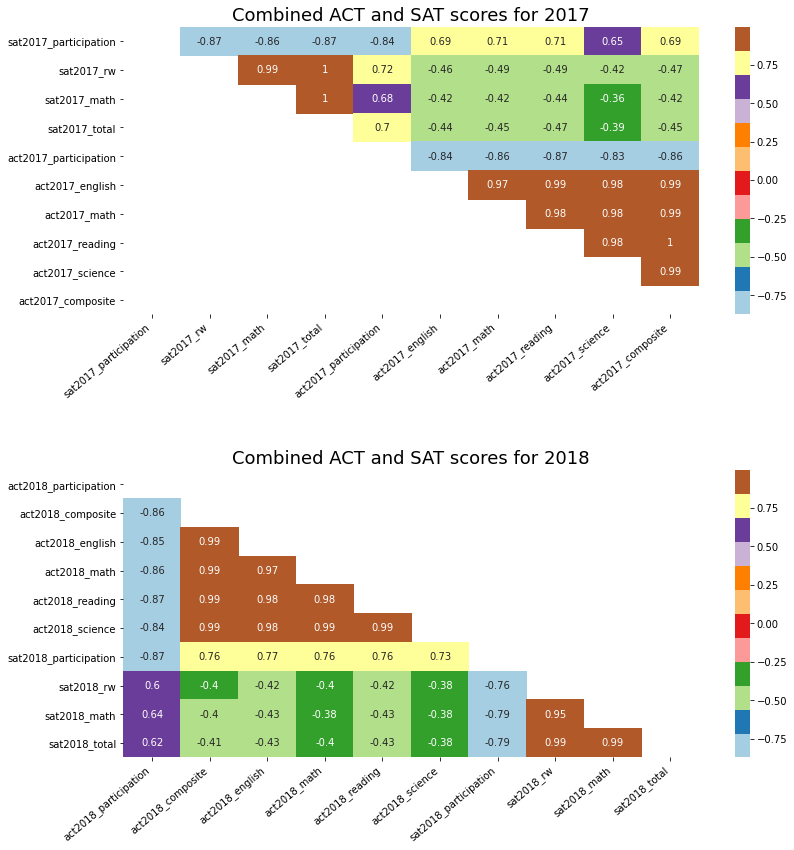

In [45]:
fig, ax = plt.subplots(2,1,figsize=(13,13)) 
# creating masks for each subplot
mask1 = np.zeros_like(combined_2017.corr())
mask1[np.tril_indices_from(mask1)] = True
mask2 = np.zeros_like(combined_2018.corr())
mask2[np.triu_indices_from(mask2)] = True

d=sns.heatmap(combined_2017.corr(),ax=ax[0],annot=True, mask=mask1,cmap="Paired");
d.set_xticklabels(d.get_xticklabels(), rotation=40, horizontalalignment='right')
d.set_title("Combined ACT and SAT scores for 2017", fontsize=18)
d=sns.heatmap(combined_2018.corr(),ax=ax[1],annot=True, mask=mask2,cmap="Paired");
d.set_xticklabels(d.get_xticklabels(), rotation=40, horizontalalignment='right')
d.set_title("Combined ACT and SAT scores for 2018", fontsize=18)
fig.tight_layout(pad=5.0)
plt.show()

#### Define a custom function to subplot histograms
<details>
<summary>More Info</summary>  
We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:
    </details>

In [46]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 20)
        ax[i].grid()
    for i, column in enumerate(list_of_titles):
        ax[i].set_title(column, fontsize=15)
    for i, column in enumerate(list_of_xlabels):
        ax[i].set(xlabel = column)
    for i in range(0,len(list_of_columns)):
        ax[i].set(ylabel = 'count')
    fig.tight_layout(pad=5.0)

### Plot and interpret histograms 


#### Participation rates for SAT & ACT
- There is a clear left skew in the ACT particpation rate
- There is a clear right skew in the SAT particpation rate

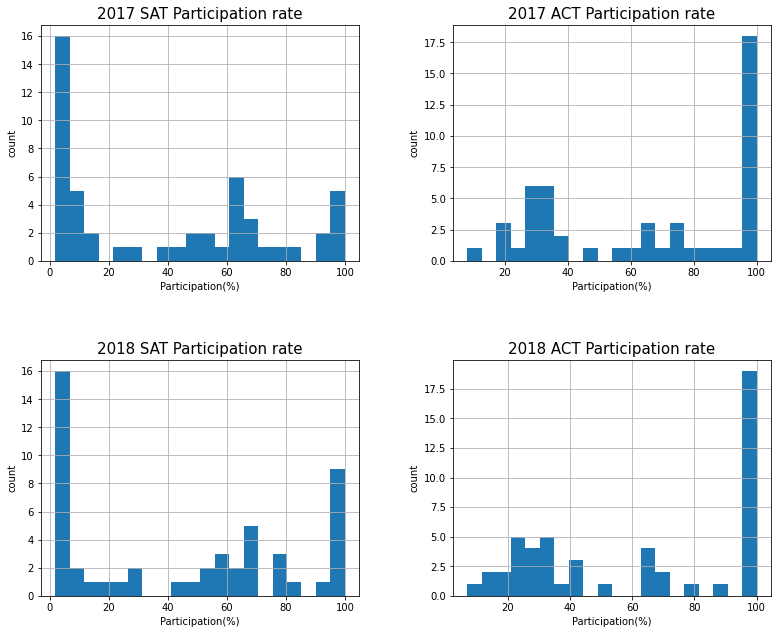

In [47]:
part_rate = ['sat2017_participation', 'act2017_participation', 'sat2018_participation','act2018_participation']
part_title = ['2017 SAT Participation rate','2017 ACT Participation rate', '2018 SAT Participation rate',
                        '2018 ACT Participation rate']
part_xlabel = ['Participation(%)', 'Participation(%)','Participation(%)', 'Participation(%)']   
                

subplot_histograms(final, part_rate, part_title, part_xlabel)

#### Math scores for SAT & ACT
- The SAT 2017 scores seem to have a normal distribution, the 2018 scores are bimodal
- The ACT 2017 Math score has 3 modes while the 2018 scores are bimodal


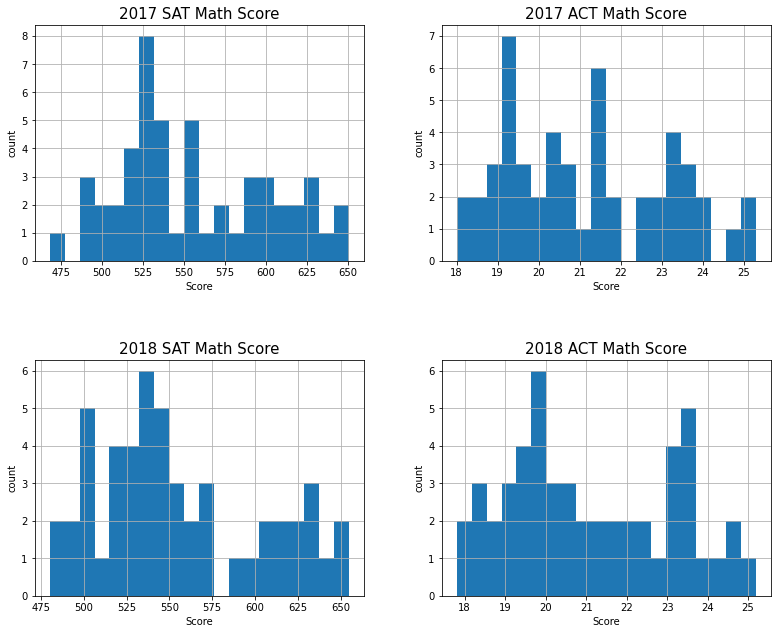

In [48]:
math_score = ['sat2017_math', 'act2017_math', 'sat2018_math','act2018_math']
math_title = ['2017 SAT Math Score','2017 ACT Math Score', '2018 SAT Math Score',
                        '2018 ACT Math Score']
math_xlabel = ['Score', 'Score','Score', 'Score']

subplot_histograms(final, math_score, math_title, math_xlabel)

#### Reading/verbal scores for SAT & ACT
- SAT has more high score states than ACT 
- Both SAT and ACT plots are observed to be bimodal across both years

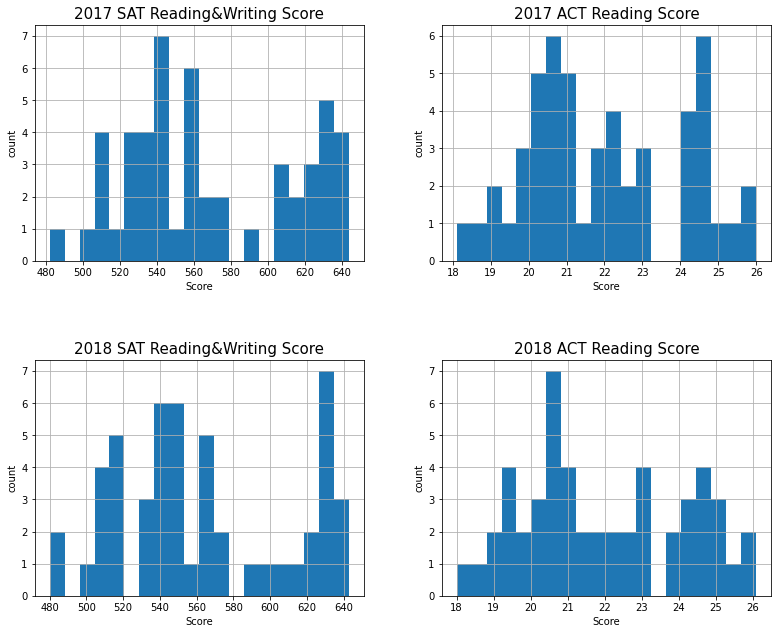

In [49]:
reading_score = ['sat2017_rw', 'act2017_reading', 'sat2018_rw','act2018_reading']
reading_title = ['2017 SAT Reading&Writing Score','2017 ACT Reading Score', '2018 SAT Reading&Writing Score',
                        '2018 ACT Reading Score']
reading_xlabel = ['Score', 'Score','Score', 'Score']

subplot_histograms(final, reading_score, reading_title, reading_xlabel)

### Plot and interpret scatter plots


In [50]:
# Create function to plot scatter and best fit line
def plotter(dataframe, x_factor, y_factor, title, xlabel, ylabel):
    plt.figure(figsize = (10,15)) 
    sns.set_style("ticks")
    sns.lmplot(x = x_factor, y = y_factor, data = dataframe, fit_reg = True,scatter_kws={"s": 40})
                
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return plt.show();

#### SAT vs. ACT math scores for 2017
A negative correlation can be observed

<Figure size 720x1080 with 0 Axes>

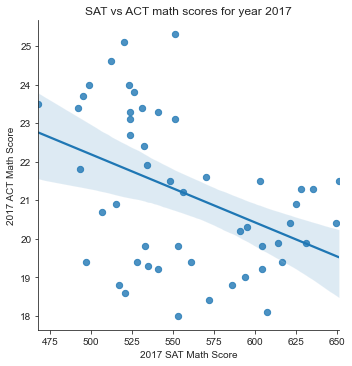

In [51]:
plotter(final, 'sat2017_math', 'act2017_math', 'SAT vs ACT math scores for year 2017',
               '2017 SAT Math Score', '2017 ACT Math Score')

#### SAT vs. ACT verbal/reading scores for 2017
A negative correlation can be observed

<Figure size 720x1080 with 0 Axes>

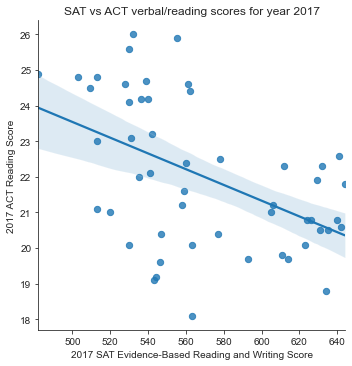

In [52]:
plotter(final, 'sat2017_rw', 'act2017_reading', 'SAT vs ACT verbal/reading scores for year 2017',
               '2017 SAT Evidence-Based Reading and Writing Score', '2017 ACT Reading Score')

#### SAT vs. ACT total/composite scores for 2017
A negative correlation can be observed

<Figure size 720x1080 with 0 Axes>

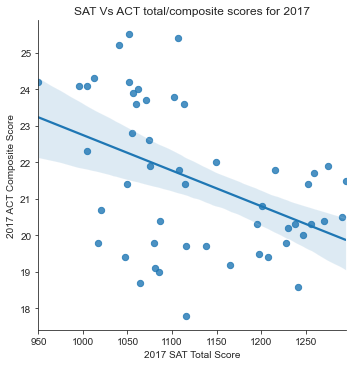

In [53]:
plotter(final, 'sat2017_total', 'act2017_composite', 'SAT Vs ACT total/composite scores for 2017',
               '2017 SAT Total Score', '2017 ACT Composite Score')

#### Total scores for SAT 2017 vs. 2018
A strong positive correlation is observed

<Figure size 720x1080 with 0 Axes>

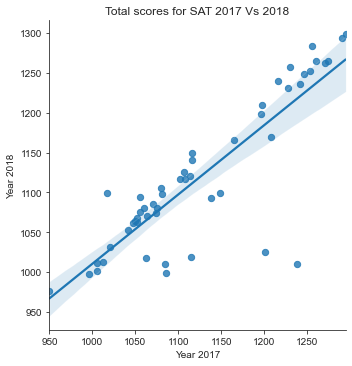

In [54]:
plotter(final, 'sat2017_total', 'sat2018_total', 'Total scores for SAT 2017 Vs 2018',
               'Year 2017', 'Year 2018')

#### Composite scores for ACT 2017 vs. 2018
A strong positive correlation is observed

<Figure size 720x1080 with 0 Axes>

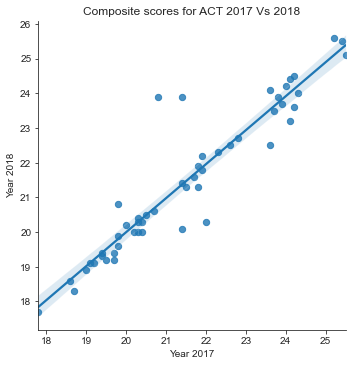

In [55]:
plotter(final, 'act2017_composite', 'act2018_composite', 'Composite scores for ACT 2017 Vs 2018',
               'Year 2017', 'Year 2018')

### Plot and interpret boxplots

<details>
<summary>More Info</summary>  
For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels 
</detail>

#### Interpretation of SAT components 
- There is a slight dip in the median score for the reading & writing score Year-on-Year(YOY)
- Overall, students did better for their math component in 2018, although the median score has a slight dip

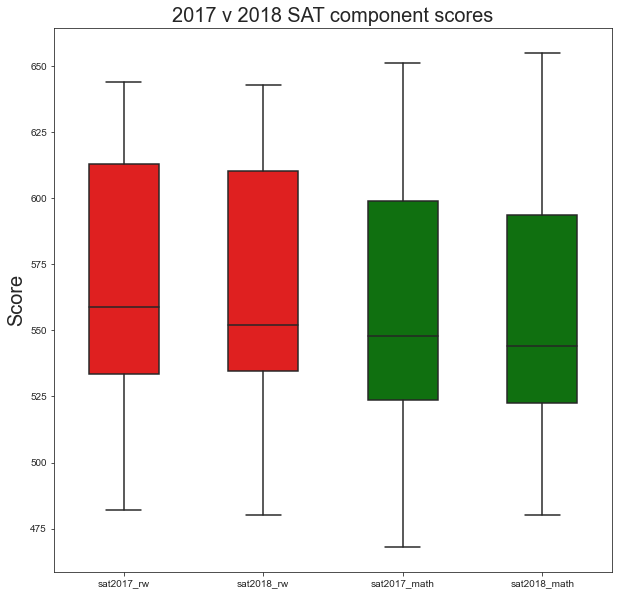

In [56]:
ax = plt.subplots(figsize=(10,10))
plt.title('2017 v 2018 SAT component scores',fontsize=20)
plt.ylabel('Score',fontsize=20)
x_col = {'sat2017_rw': 'red', 'sat2018_rw': 'red', 'sat2017_math' : 'green', 'sat2018_math':'green' }
sns.boxplot(data=final[['sat2017_rw','sat2018_rw','sat2017_math','sat2018_math']],width=0.5,palette=x_col);

#### Interpretation of SAT Total score
- Students have improved in 2018, as observed by the increase in the minimum score
- The distribution in 2018 is slightly smaller

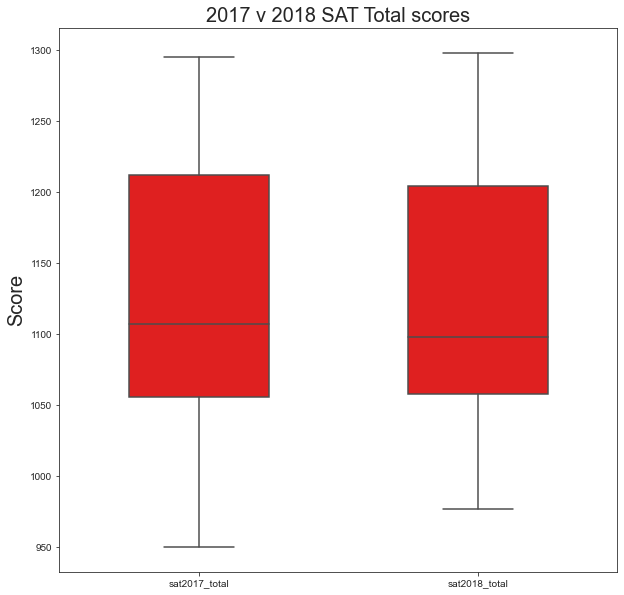

In [57]:
# SAT Total boxplot
ax = plt.subplots(figsize=(10,10))
plt.title('2017 v 2018 SAT Total scores',fontsize=20)
plt.ylabel('Score',fontsize=20)
x_col = {'sat2017_total': 'red', 'sat2018_total': 'red' }
sns.boxplot(data=final[['sat2017_total','sat2018_total']],width=0.5,palette=x_col);

#### Interpretation of ACT component scores
- There is a high variance in the 2018 engligh scores from the median above.
- The overall performance having a slight dip in median from year 2017 to 2018.
- The science scores had a tighter distribution than the other components.
- Similar to the SAT total scores, there is a tigther distribution in the 2018 composite scores

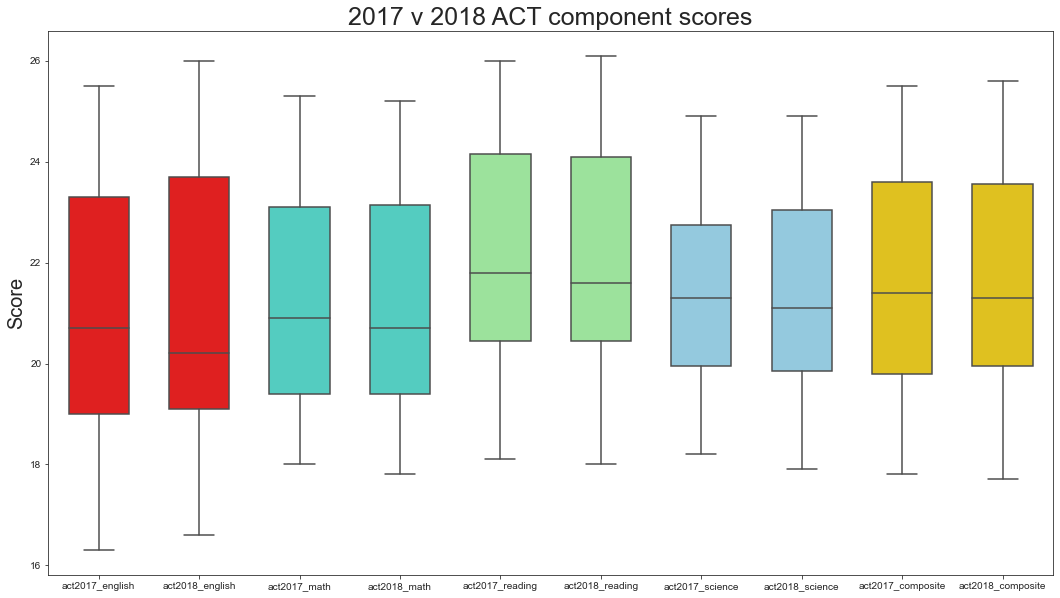

In [58]:
# ACT boxplot
ax = plt.subplots(figsize=(18,10))
plt.title('2017 v 2018 ACT component scores',fontsize=25)
plt.ylabel('Score',fontsize=20)
box_col = {'act2017_english': 'red', 'act2018_english': 'red', 'act2017_math': 'turquoise', 'act2018_math':'turquoise', 'act2017_reading':'lightgreen', 'act2018_reading':'lightgreen', 'act2017_science':'skyblue', 'act2018_science':'skyblue','act2017_composite':'gold','act2018_composite':'gold'}
sns.boxplot(data=final[['act2017_english','act2018_english','act2017_math','act2018_math','act2017_reading','act2018_reading','act2017_science','act2018_science','act2017_composite','act2018_composite']],width=0.6,palette=box_col);

#### Interpretation of SAT/ACT particpation rates
- There are no whiskers on the ACT plots, indicating a tighter distrbution between the median and max values. This could be a result that most states who particpated in the ACT were state mandated, having 100% participation.
- There is a definite increase in the SAT participation rate YOY, although the distribution in SAT 2018 rates are comparatively taller.

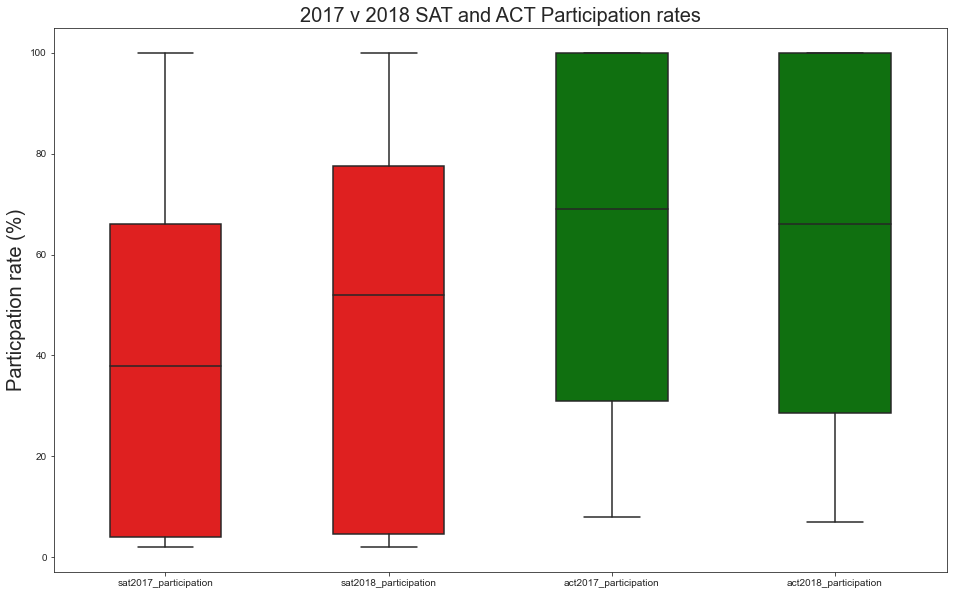

In [59]:
# ACT/SAT particpation rates
ax = plt.subplots(figsize=(16,10))
plt.title('2017 v 2018 SAT and ACT Participation rates',fontsize=20)
plt.ylabel('Particpation rate (%)',fontsize=20)
x_col = {'sat2017_participation': 'red', 'sat2018_participation': 'red', 'act2017_participation' : 'green', 'act2018_participation':'green' }
sns.boxplot(data=final[['sat2017_participation', 'sat2018_participation','act2017_participation', 'act2018_participation']],width=0.5,palette=x_col);

<details>
<summary>More Info</summary>  #### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.
    </details>

## Additional analysis

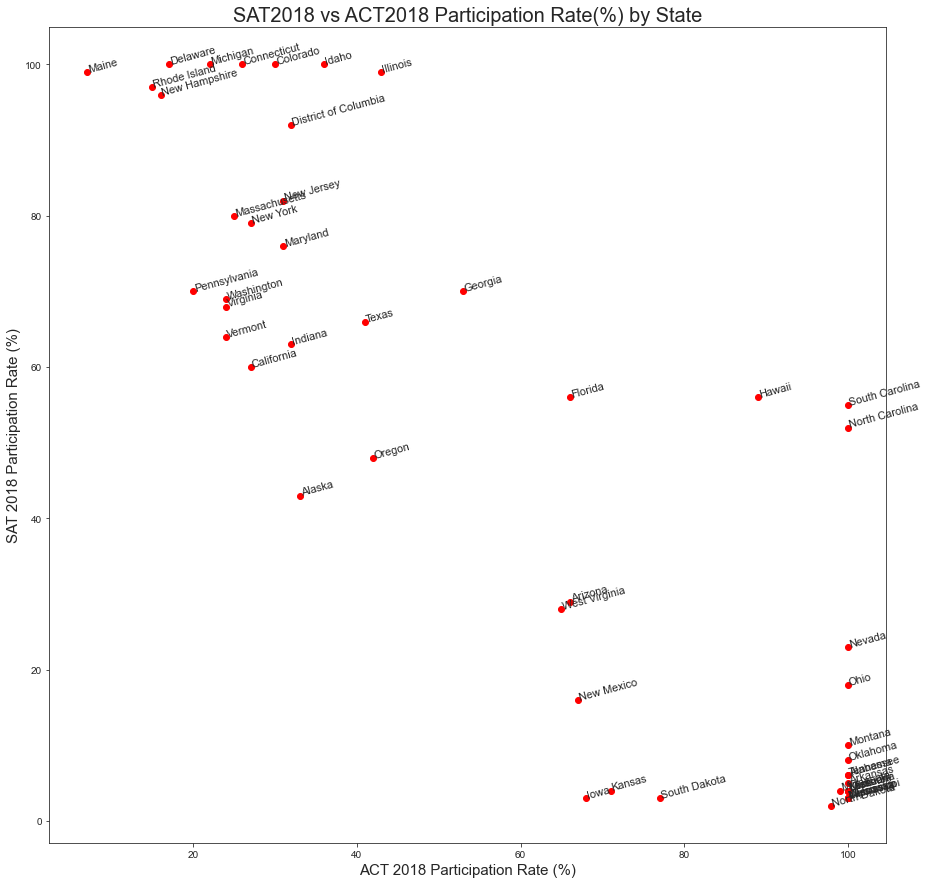

In [60]:
x = final['act2018_participation']
y = final['sat2018_participation']
z = final['state']
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(x, y,color="red")
plt.xlabel('ACT 2018 Participation Rate (%)',fontsize=15)
plt.ylabel('SAT 2018 Participation Rate (%)',fontsize=15)
plt.title('SAT2018 vs ACT2018 Participation Rate(%) by State',fontsize=20)


for i, state in enumerate(z):
    ax.annotate(state, (x[i],y[i]),fontsize=11,rotation=15)

plt.show()

### I would like to understand the correlation between states and both their participation rates.
<i> (For the analysis, I would be referring to 2018 rates due to its comparative distribution</i>

#### Observations:
- Corresponding with the prior visualisations, we know states in the bottom far right and top far left quadrands favour one test over the other.
- The 4 states in the middle; Texas, Georgia, Florida and Oregon are of interest as they seem to have a decent equal proportion with regards to both tests, possibly signifying these states may easily favour one test over the other with sufficient motivation provided.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [61]:
x = final.describe().T.round(2)
y = final.skew().T.round(3)
describe_plus_skew = pd.concat([x,y.rename('skew')], axis=1)
describe_plus_skew

,count,mean,std,min,25%,50%,75%,max,skew
sat2017_participation,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0,0.346
sat2017_rw,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0,0.273
sat2017_math,51.0,556.88,47.12,468.0,523.50,548.0,599.00,651.0,0.365
sat2017_total,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0,0.311
act2017_participation,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0,-0.198
act2017_english,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5,0.353
act2017_math,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3,0.333
act2017_reading,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0,0.269
act2017_science,51.0,21.43,1.73,18.2,19.95,21.3,22.75,24.9,0.237
act2017_composite,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5,0.320



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

##### Answer: No, as most of the test results are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

##### Answer: For math and reading are more normally distributed but the shape still yet skewed either to left or right and the peaks did not lied on central. As for the participation rates, there is a left tail skew due to states taking one test or the other.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

##### Answer:  No, SAT and ACT have different test measurements and participation rates have an inverse relationship in most states as observed in the advanced analysis section above.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

##### Answer: No, as the samples of students taking the SAT or ACT are not equivalent. Some states require one test or the other, so we could expect those states to have lower scores than a state where only the top students took the test (this is supported by the inverse relationship between participation rate and test score).

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

##### Answer: 

Based on the example qn above,

 ` Let H0: There is no difference between SAT2017 math scores and ACT2017 math scores`
 
` Let HA: There is a significant difference between SAT2017 math scores and ACT2017 math scores`

` Confidence level is set at 95%`

In [62]:
#size of sample = no. of states
n = 51

# 2017 SAT math stats
mean1=np.mean(final['sat2017_math'])
std1=np.std(final['sat2017_math'])

# 2017 ACT math stats
mean2=np.mean(final['act2017_math'])
std2=np.std(final['act2017_math'])

results = stats.ttest_ind_from_stats(mean1,std1,n, mean2,std2,n)
results

Ttest_indResult(statistic=81.9228121078972, pvalue=1.7472370738207526e-93)

#### Based on the pvalue above, it is significantly lower than 0.05. Therefore, we reject the null hypothesis, and accept the alternative hypothesis that there is a significant difference between SAT2017 math scores and ACT2017 math scores

## Outside Research

<details>
<summary>More Info</summary>  Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).
    </details>

#### Exploring the funding and state requirements of SAT and/or ACT tests, I wanted to see if there were any interesting outliers that didnt fit the regular trend...


In [63]:
funded_states = ['Ohio','Arkansas','Idaho']
final[final['state'].isin(funded_states)].loc[:,['state', 'sat2017_participation', 'act2017_participation', 'sat2017_total', 'act2017_composite']]

,state,sat2017_participation,act2017_participation,sat2017_total,act2017_composite
3,Arkansas,3,100,1208,19.4
12,Idaho,93,38,1005,22.3
35,Ohio,12,75,1149,22.0


![image of funded states](../data/funded_st.png)

#### data source: [link here](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/)

##### These 3 states that are worth taking a closer look at:

1) Arkansas (Doesn't require ACT but will pay students to take it)
    - Even though it's not compulsory, students make full use of the state funding to take the ACT 
    - Their composite score is below the 25% percentile of all states (19.8)
2) Idaho (No state funding but required to take either test)
    - Students seem to favour SAT which is a stark contrast to the surrounding mid west states that tend to 
      favour the ACT
    - Given the fact that there are only has 2 components to the test, students perceive the SAT might be easier to score. 
    - Although their states scores are below the 25% percentile (1055)
    
3) Ohio (State requires either SAT or ACT, but will only pay for SAT)
    - Even though the state will pay for the SAT, Ohio students prefer taking the ACT
    - Not sure if neighbouring Kentucky (ACT required) plays any influence, or perhaps students would like to              attend colleges in Kentucky or other mid west states, instead of Ohio

## Conclusions and Recommendations

<details>
<summary>More Info</summary>  Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?
    </details>

##### Key Takeways:

1) A 100% participation rate can only be acheived by the state making either test mandatory and providing the necessary funding to make it affordable for students.
    - For example, Ohio state had made either ACT or SAT compulsory for high school students. This resulted both test participation rates to increase.
    
2) Overall SAT scores improved in year 2018 despite the higher participation rate comparing to previous year, while ACT score remains relatively stable.

3) The [cost of SAT test is relatively high](https://www.vox.com/the-goods/2019/3/28/18282453/sat-act-college-admission-testing-cost-price) comparing to ACT test which might affect which tests states would sponsor.


##### Recommendation:
The state of Oregon has ACT and SAT participation rates between 40-50% consistently across both 2017 and 2018. 
The state currently neither has a requirement for either test nor does it fund students to take up any of the tests. This gives a clear indication that students are impartial to either test and might be more inclined to take one test over the other with the possiblity of funding.

<u>I would recommend the following actions:</u>

1) Comparing the costs of each test, the ACT is fiscally more sound for the state of Oregon to sponsor all high school students.

2) Create digital prep workshops or seminars to increase the student interest in the ACT and [hear sucess stories](https://www.prepscholar.com/act/s/case_studies)

3) Encouraging Oregon colleges to offer ACT sponsorships




##### ≈≈≈≈≈  Further investigation required: ≈≈≈≈≈
More details are required on college preferences of Oregon students to confirm if students would tend to enrol in colleges within Oregon, or at other colleges of the mid-west, before endorsing the ACT campaign.
